# Doing Bayesian Data Analysis

Simple example from __Chapter 16__.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
from scipy import stats as st

from utils import plt, sns

In [2]:
y = [-2, -1, 0, 1, 2, 15]
print y

with pm.Model() as model:
    # Priors
    sigma_norm = pm.Uniform("sigma_norm", 0, 100)
    mu_norm = pm.Normal("mu_norm", mu=0, tau=1E-8)

    sigma_t = pm.Uniform("sigma_t", 0, 100)
    mu_t = pm.Normal("mu_t", mu=0, tau=1E-8)
    nu = pm.Exponential("nu", 1.0 / len(y))
    # Likelihood
    y_norm = pm.Normal("y_norm", mu=mu_norm, sd=sigma_norm, observed=y)
    y_t = pm.StudentT("y_t", nu=nu, mu=mu_t, sd=sigma_t, observed=y)
    # Sample
    trace = pm.sample(draws=5000, tune=1000, njobs=3)
    
burn_in = 1000

[-2, -1, 0, 1, 2, 15]


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -60.666: 100%|██████████| 200000/200000 [00:21<00:00, 9202.46it/s]
Finished [100%]: Average ELBO = -60.669
100%|██████████| 5000/5000 [00:16<00:00, 295.37it/s]


In [3]:
pm.df_summary(trace[burn_in:])

,mean,sd,mc_error,hpd_2.5,hpd_97.5
mu_norm,2.491163,3.837273,0.050414,-5.163475,10.222548
mu_t,1.188977,3.052826,0.054713,-4.325391,7.958353
sigma_norm,8.763209,4.231224,0.071722,3.604909,16.826538
sigma_t,5.716777,4.291936,0.073284,0.551280,13.043193
nu,5.562353,5.353981,0.072960,0.232582,16.571889


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11abfe910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1197c8d50>]], dtype=object)

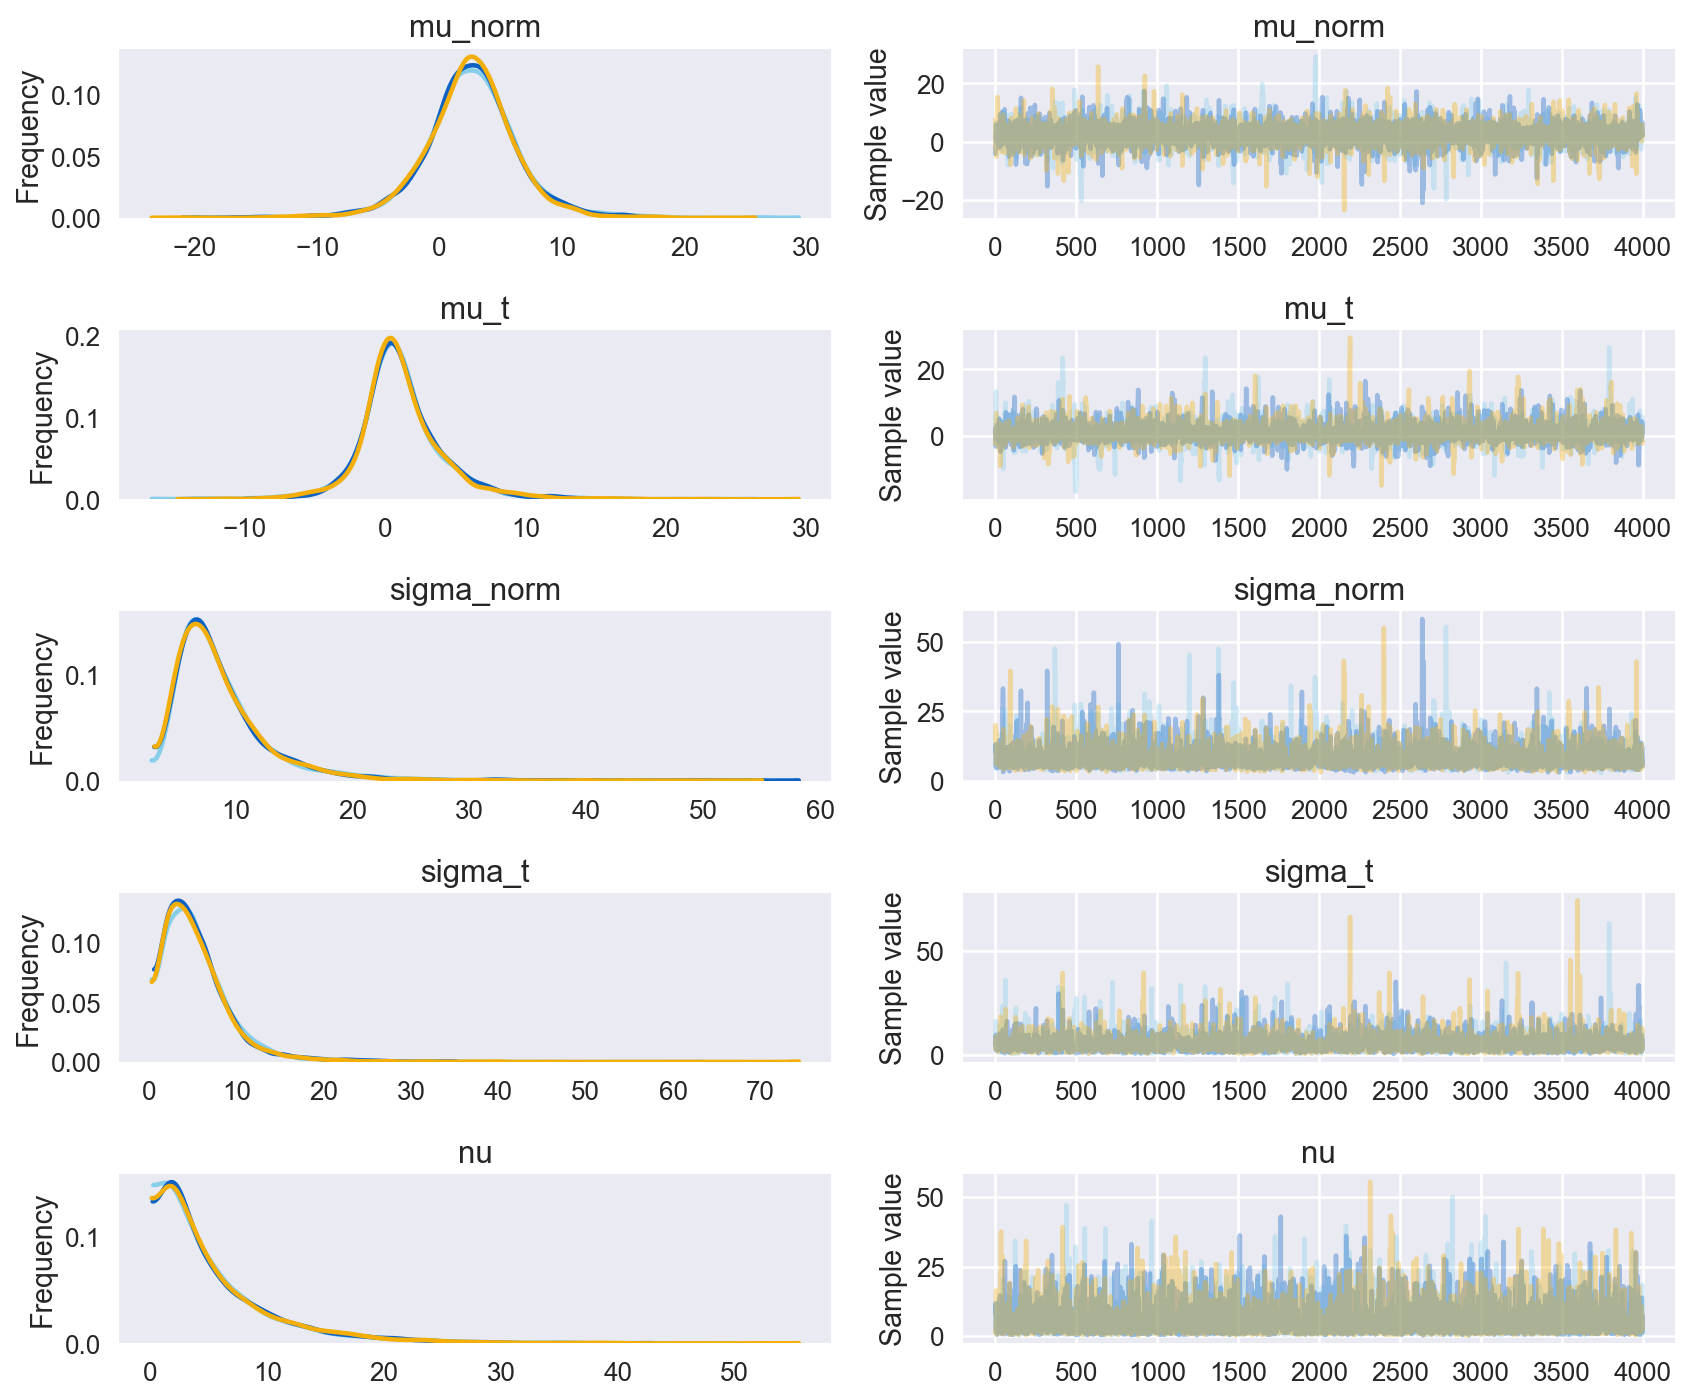

In [4]:
pm.traceplot(trace[burn_in:])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11abfe890>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b0e1d10>], dtype=object)

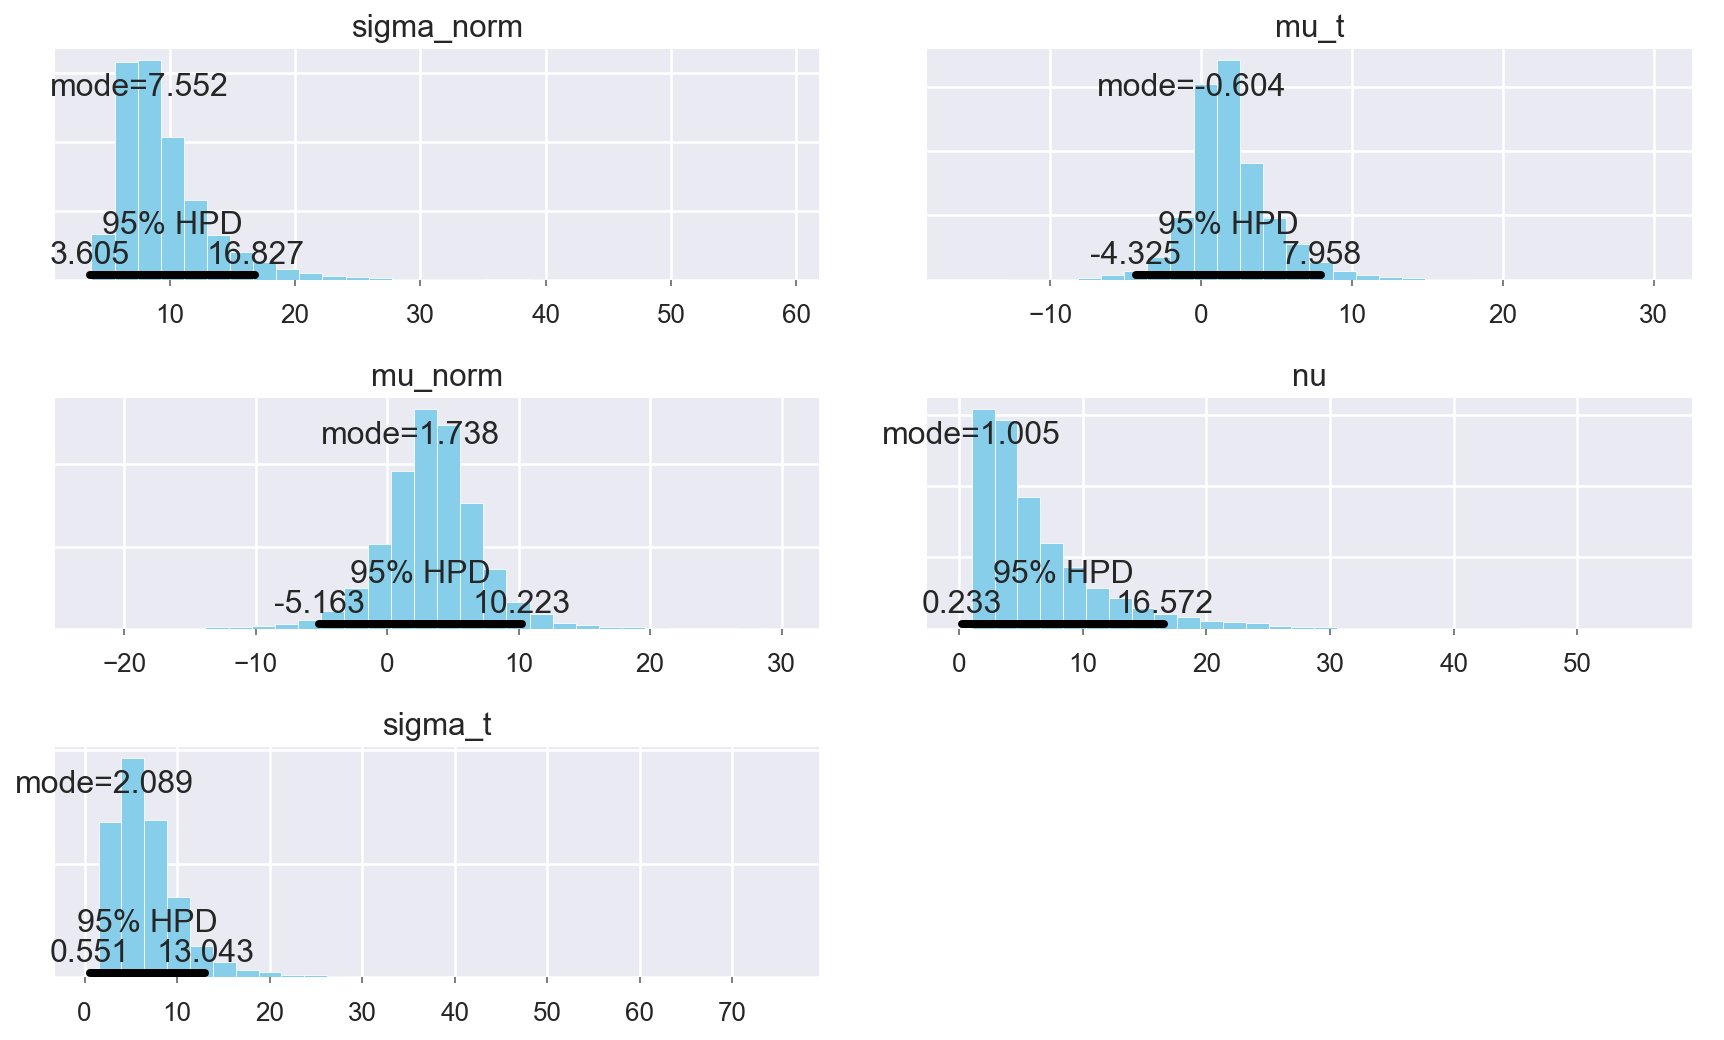

In [5]:
pm.plot_posterior(trace[burn_in:], point_estimate="mode")